In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
# Load results from file
with open('./assets/results_detection.json') as f:
    model_results = json.load(f)

results_df = pd.DataFrame(model_results['results'])
results_df

,conf_threshold,map,map50,map75,precision,recall,f1_score,annotations,predictions,tp,fp,fn
0,0.01,0.506781,0.730765,0.546712,0.349718,0.872022,0.499226,13307,33181,11604,21577,1703
1,0.02,0.503743,0.723300,0.543863,0.442921,0.854287,0.583378,13307,25666,11368,14298,1939
2,0.03,0.501324,0.717204,0.541322,0.504500,0.842414,0.631069,13307,22220,11210,11010,2097
3,0.04,0.497746,0.710512,0.540064,0.547951,0.830841,0.660375,13307,20177,11056,9121,2251
4,0.05,0.494873,0.703347,0.537126,0.583178,0.821147,0.682000,13307,18737,10927,7810,2380
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.96,0.006601,0.006601,0.006601,1.000000,0.000451,0.000901,13307,6,6,0,13301
96,0.97,0.003300,0.003300,0.003300,1.000000,0.000075,0.000150,13307,1,1,0,13306
97,0.98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13307,0,0,0,13307
98,0.99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13307,0,0,0,13307


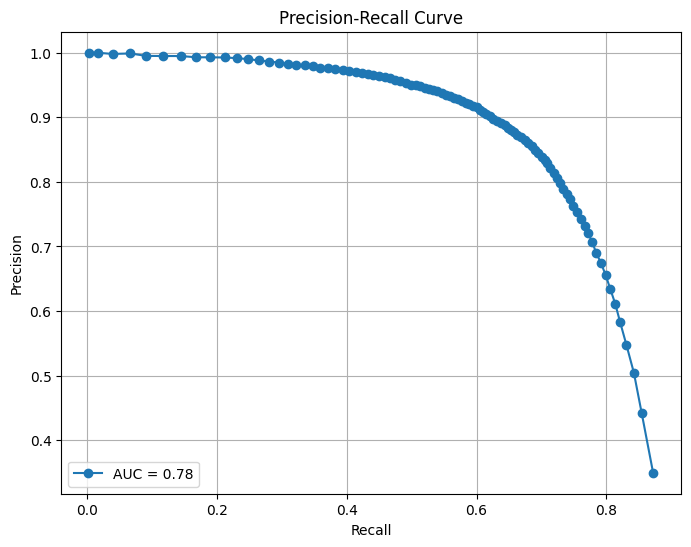

In [4]:
pr_curve_df = results_df[['conf_threshold', 'precision', 'recall']]
pr_curve_df = pr_curve_df[pr_curve_df['conf_threshold'] <= 0.95]
pr_curve_df = pr_curve_df.sort_values(by='recall', ascending=True)

# Compute AUC using numpy's trapezoidal rule
auc_pr = np.trapz(pr_curve_df['precision'], pr_curve_df['recall'])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(pr_curve_df['recall'], pr_curve_df['precision'], marker='o', label=f'AUC = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.show()